# Bước 1: Import thư viện

In [100]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import math
import datetime as dt
import matplotlib.pyplot as plt #vẽ biểu đồ
import seaborn as sb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.models import load_model #tải mô hình
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM 
from keras.layers import SimpleRNN
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất

# Kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score  
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Bước 2: Đọc dữ liệu

In [101]:
# đọc dữ liệu từ file csv
df = pd.read_csv('Du lieu Lich su VNM 2013_2023.csv')

In [102]:
df


,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất,KL,% Thay đổi
0,21/07/2023,"73,500.0","72,500.0","75,000.0","72,400.0",3.12M,1.10%
1,20/07/2023,"72,700.0","72,600.0","72,900.0","72,300.0",2.45M,0.14%
2,19/07/2023,"72,600.0","72,500.0","73,000.0","72,400.0",2.95M,0.28%
3,18/07/2023,"72,400.0","72,500.0","72,600.0","72,200.0",2.93M,0.14%
4,17/07/2023,"72,300.0","73,000.0","73,600.0","72,200.0",3.92M,-1.36%
...,...,...,...,...,...,...,...
2500,16/07/2013,"96,528.0","95,139.0","97,222.0","95,139.0",729.69K,1.46%
2501,15/07/2013,"95,139.0","95,139.0","95,833.0","94,444.0",176.98K,0.00%
2502,12/07/2013,"95,139.0","94,444.0","95,139.0","93,750.0",220.82K,0.74%
2503,11/07/2013,"94,444.0","94,444.0","95,139.0","93,750.0",161.84K,0.00%


In [103]:
# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

# Bước 3: Mô tả dữ liệu

In [104]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [105]:
#kích thước dữ liệu
df.shape

(2505, 5)

In [106]:
#dữ liệu 5 dòng đầu
df.head()

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,2023-07-21,"73,500.0","72,500.0","75,000.0","72,400.0"
1,2023-07-20,"72,700.0","72,600.0","72,900.0","72,300.0"
2,2023-07-19,"72,600.0","72,500.0","73,000.0","72,400.0"
3,2023-07-18,"72,400.0","72,500.0","72,600.0","72,200.0"
4,2023-07-17,"72,300.0","73,000.0","73,600.0","72,200.0"


In [107]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ngày       2505 non-null   datetime64[ns]
 1   Đóng cửa   2505 non-null   object        
 2   Mở cửa     2505 non-null   object        
 3   Cao nhất   2505 non-null   object        
 4   Thấp nhất  2505 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 98.0+ KB


In [108]:
# Xem khoảng thời gian của bộ dữ liệu
print("Ngày đầu tiên trong bộ dữ liệu: ", df.iloc[-1][0])
print("Ngày cuối cùng trong bộ dữ liệu: ",df.iloc[0][0])
print("Khoảng thời gian: ", df.iloc[0][0]-df.iloc[-1][0])

Ngày đầu tiên trong bộ dữ liệu:  2013-07-10 00:00:00
Ngày cuối cùng trong bộ dữ liệu:  2023-07-21 00:00:00
Khoảng thời gian:  3663 days 00:00:00


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29676\835474774.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Ngày đầu tiên trong bộ dữ liệu: ", df.iloc[-1][0])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29676\835474774.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Ngày cuối cùng trong bộ dữ liệu: ",df.iloc[0][0])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29676\835474774.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `se

In [109]:
#mô tả bộ dữ liệu
df.describe()

,Ngày
count,2505
mean,2018-07-17 16:17:14.730539008
min,2013-07-10 00:00:00
25%,2016-01-13 00:00:00
50%,2018-07-19 00:00:00
75%,2021-01-14 00:00:00
max,2023-07-21 00:00:00


# Bước 4: Tiền xử lý dữ liệu

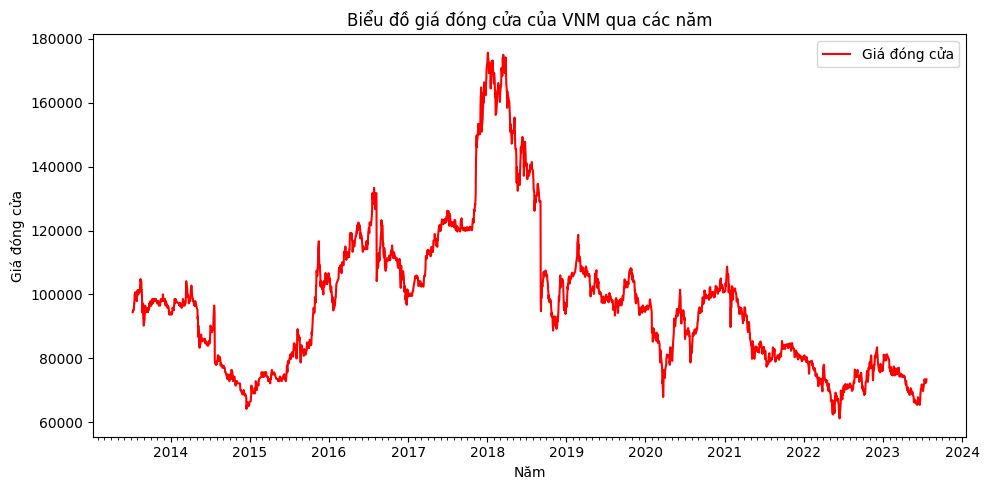

In [110]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29676\4005526683.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29676\4005526683.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29676\4005526683.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hist

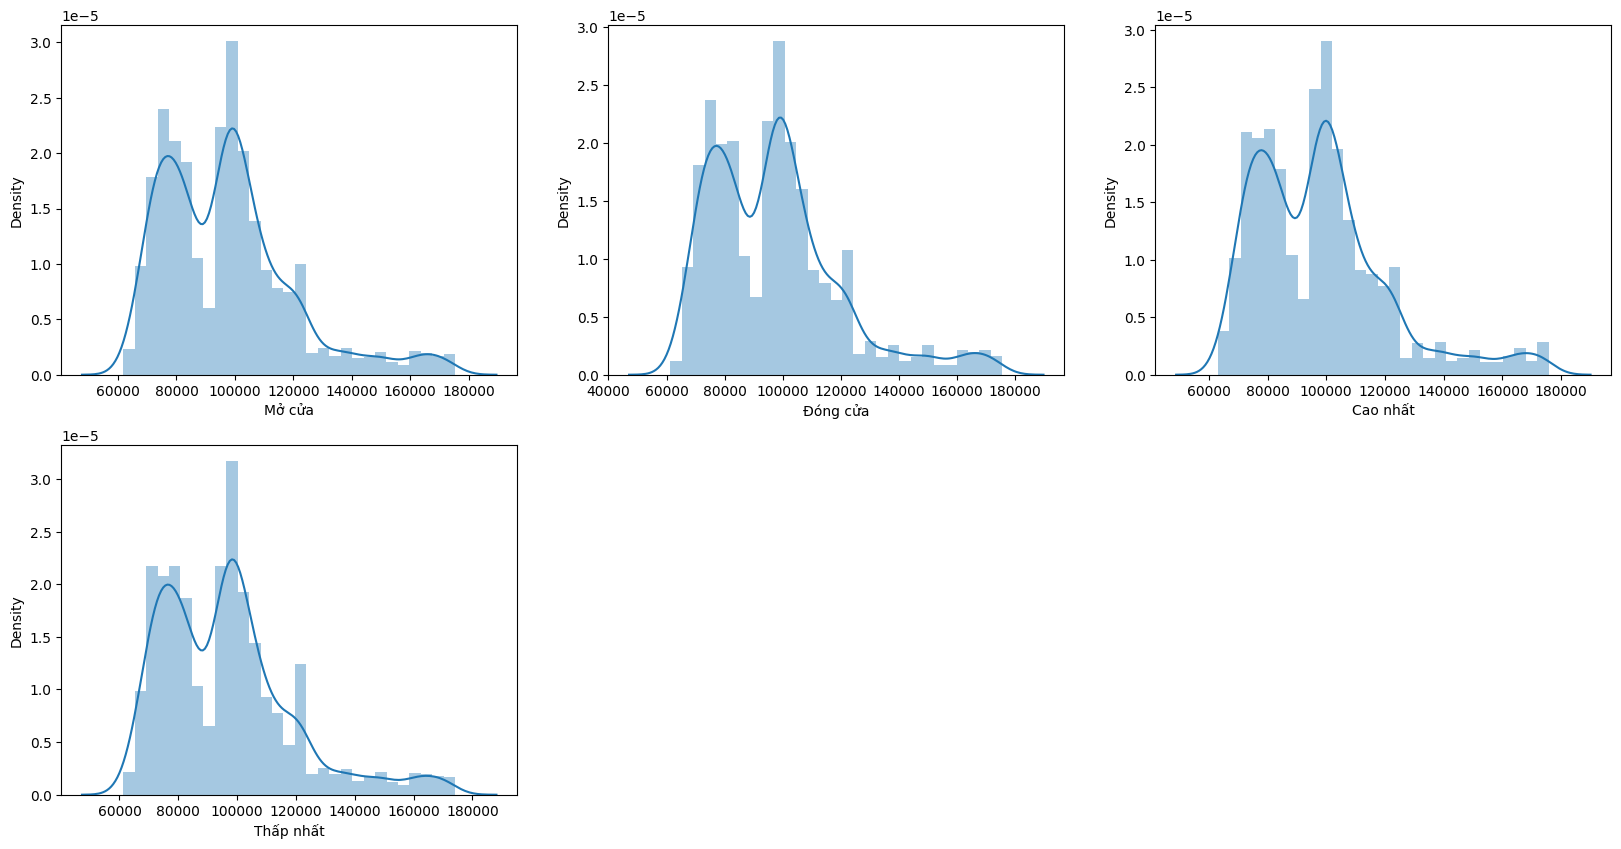

In [111]:
features = ['Mở cửa', 'Đóng cửa', 'Cao nhất', 'Thấp nhất']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

Trong biểu đồ phân phối dữ liệu OHLC, chúng ta có thể thấy hai đỉnh có nghĩa là dữ liệu đã thay đổi đáng kể ở hai vùng. Và dữ liệu có xu hướng bị lệch trái.

In [112]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1.head()

,Đóng cửa
Ngày,
2013-07-10,94444.0
2013-07-11,94444.0
2013-07-12,95139.0
2013-07-15,95139.0
2013-07-16,96528.0


## Chia tập dữ liệu

In [113]:
df1.head()

,Đóng cửa
Ngày,
2013-07-10,94444.0
2013-07-11,94444.0
2013-07-12,95139.0
2013-07-15,95139.0
2013-07-16,96528.0


In [114]:

data = df1['Đóng cửa'] 
  
# using the train test split function 
train_data, test_data = train_test_split(data , 
								random_state=104, 
								test_size=0.2, 
								shuffle=True) 

# printing out train and test sets 

print('data_train : ') 
print(train_data.head()) 
print(train_data.shape)
print('') 
print('data_test : ') 
print(test_data.head())
print(test_data.shape) 
print('') 


data_train : 
Ngày
2017-07-21    121308.0
2022-04-18     73132.2
2019-11-07    103923.0
2014-06-02     86111.0
2016-12-15    100793.0
Name: Đóng cửa, dtype: float64
(2004,)

data_test : 
Ngày
2022-10-14     72700.1
2018-12-21     95091.0
2013-08-15    104861.0
2014-08-28     77083.0
2015-12-28    105833.0
Name: Đóng cửa, dtype: float64
(501,)



## Chuẩn hóa dữ liệu

In [115]:
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(df1.values)

In [116]:
## Tạo tập x_train và y_train

In [117]:
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) # giá đóng cửa 50 ngày cuối cùng trong tệp dữ liệu
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [118]:
x_train #x_train là một chuỗi các giá trị đóng cửa liên tiếp trong quá khứ.

[array([0.29027738, 0.29027738, 0.29635691, 0.29635691, 0.30850724,
        0.31457803, 0.31457803, 0.33887869, 0.34494948, 0.34494948,
        0.32672836, 0.33279915, 0.33887869, 0.32065757, 0.32672836,
        0.34494948, 0.34494948, 0.35102902, 0.33887869, 0.35102902,
        0.34494948, 0.34494948, 0.34494948, 0.34494948, 0.35709981,
        0.36925013, 0.38140046, 0.37532967, 0.37532967, 0.35102902,
        0.35102902, 0.33279915, 0.29027738, 0.31457803, 0.30850724,
        0.27205626, 0.26598547, 0.25383514, 0.27205626, 0.29027738,
        0.30850724, 0.30850724, 0.29027738, 0.3024277 , 0.3024277 ,
        0.29635691, 0.3024277 , 0.29635691, 0.29635691, 0.29027738]),
 array([0.29027738, 0.29635691, 0.29635691, 0.30850724, 0.31457803,
        0.31457803, 0.33887869, 0.34494948, 0.34494948, 0.32672836,
        0.33279915, 0.33887869, 0.32065757, 0.32672836, 0.34494948,
        0.34494948, 0.35102902, 0.33887869, 0.35102902, 0.34494948,
        0.34494948, 0.34494948, 0.34494948, 0.

In [119]:
y_train #y_train chứa giá trị đóng cửa  tiếp theo mà mô hình dự đoán. 

[0.2963569134842401,
 0.30242770379791795,
 0.2963569134842401,
 0.30242770379791795,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.32065756981190174,
 0.30850724164807086,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.3267283601255797,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756

In [120]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

In [121]:
#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

# Bước 5: Xây dựng và huấn luyện mô hình

## Mô hình LSTM

In [122]:
#Xây dựng mô hình

model = Sequential()
model.add(LSTM(units=128, input_shape = (x_train.shape[1],1), return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0,5))
model.add(Dense(1))
model.compile(loss = 'mean_absolute_error', optimizer = 'adam')

In [123]:
#Huấn luyện mô hình
save_model = 'save_model.hdf5'
best_model = ModelCheckpoint(save_model, monitor = 'loss', verbose = 2, save_best_only=True, mode = 'auto')
history2 = model.fit(x_train, y_train, epochs=50, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/50

Epoch 1: loss improved from inf to 0.05906, saving model to save_model.hdf5
40/40 - 8s - loss: 0.0591 - 8s/epoch - 199ms/step
Epoch 2/50


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.05906 to 0.02497, saving model to save_model.hdf5
40/40 - 3s - loss: 0.0250 - 3s/epoch - 76ms/step
Epoch 3/50

Epoch 3: loss improved from 0.02497 to 0.02407, saving model to save_model.hdf5
40/40 - 3s - loss: 0.0241 - 3s/epoch - 69ms/step
Epoch 4/50

Epoch 4: loss improved from 0.02407 to 0.02071, saving model to save_model.hdf5
40/40 - 3s - loss: 0.0207 - 3s/epoch - 76ms/step
Epoch 5/50

Epoch 5: loss improved from 0.02071 to 0.01859, saving model to save_model.hdf5
40/40 - 3s - loss: 0.0186 - 3s/epoch - 66ms/step
Epoch 6/50

Epoch 6: loss improved from 0.01859 to 0.01797, saving model to save_model.hdf5
40/40 - 3s - loss: 0.0180 - 3s/epoch - 77ms/step
Epoch 7/50

Epoch 7: loss did not improve from 0.01797
40/40 - 3s - loss: 0.0190 - 3s/epoch - 80ms/step
Epoch 8/50

Epoch 8: loss improved from 0.01797 to 0.01638, saving model to save_model.hdf5
40/40 - 3s - loss: 0.0164 - 3s/epoch - 76ms/step
Epoch 9/50

Epoch 9: loss improved from 0.01638 to 0.01559, s

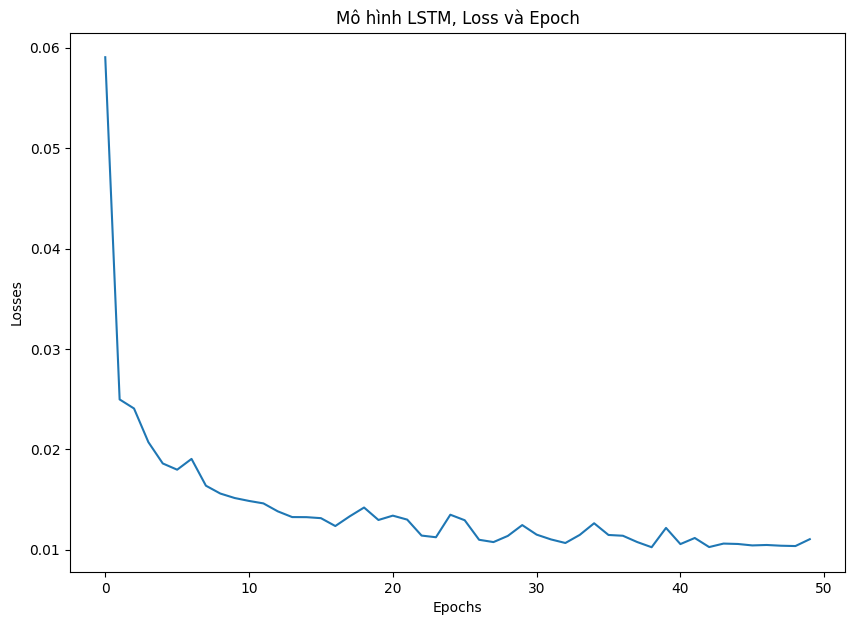

In [124]:
plt.figure(figsize =(10,7))
plt.plot(history2.history["loss"]) 
#Loss là một số đo đánh giá mức độ sai lệch giữa giá trị dự đoán của mô hình và giá trị thực tế
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Mô hình LSTM, Loss và Epoch")
plt.show()

In [125]:
#Dữ liệu train
y_train = sc.inverse_transform(y_train)  # giá thực
final_model = load_model('save_model.hdf5')
y_train_predict = final_model.predict(x_train)
y_train_predict = sc.inverse_transform(y_train_predict)  # gía dự đoán

62/62 [==============================] - 2s 20ms/step


In [126]:
#xử lý dữ liệu test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test = data[1954:] #giá thực
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) #giá dự đoán

# Kiểm tra và cắt bớt mẫu 
min_length = min(len(y_test), len(y_test_predict))
y_test = y_test[:min_length]
y_test_predict = y_test_predict[:min_length]


16/16 [==============================] - 1s 25ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29676\719625468.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29676\719625468.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu


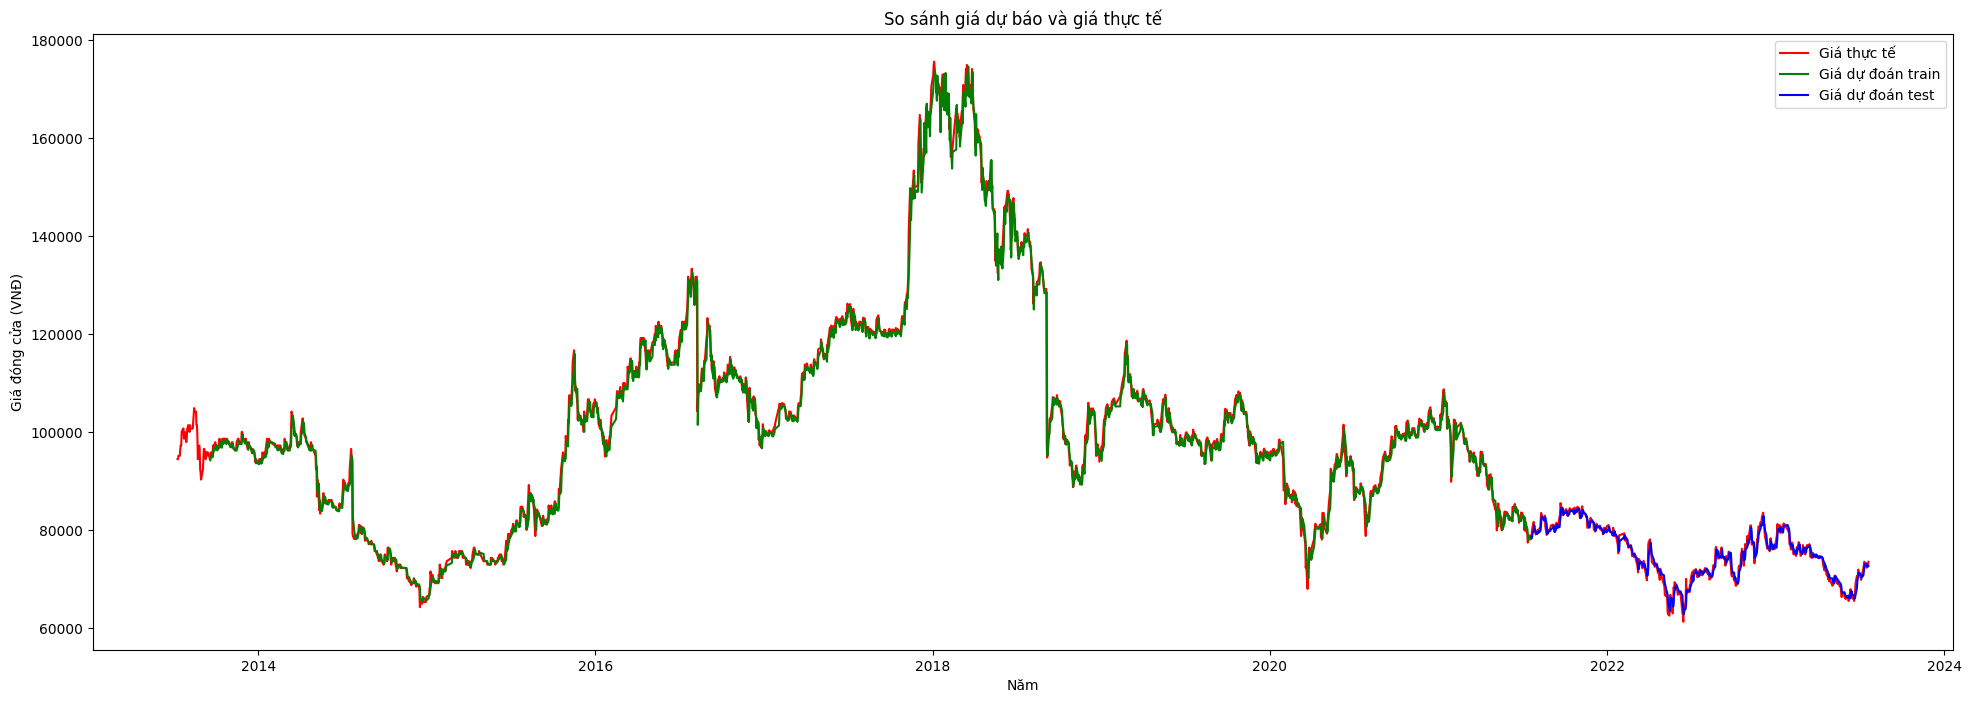

In [127]:
#lập biểu đồ so sánh
train_data1 = df1[50:2004]
test_data1 = df1[2004:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Năm') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [128]:
print('Độ phù hợp của tập train:', r2_score(y_train,y_train_predict))
print('Sai số tuyệt đối trung bình của tập train:', mean_absolute_error(y_train, y_train_predict))
print('Phần trăm sai số tuyệt đối trung bình tập train:', mean_absolute_percentage_error(y_train, y_train_predict))

Độ phù hợp của tập train: 0.9922239300053987
Sai số tuyệt đối trung bình của tập train: 1200.091095589176
Phần trăm sai số tuyệt đối trung bình tập train: 0.01150901674062752


In [129]:
train_data1

,Đóng cửa,Dự đoán
Ngày,,
2013-09-19,95139.0,94207.976562
2013-09-20,95833.0,94633.851562
2013-09-23,95139.0,95296.195312
2013-09-24,95833.0,94824.929688
2013-09-25,97222.0,95258.007812
...,...,...
2021-07-14,78054.9,78052.695312
2021-07-15,78238.5,77963.343750
2021-07-16,78881.3,78118.179688


In [130]:
print('Độ phù hợp của tập test:', r2_score(y_test,y_test_predict))
print('Sai số tuyệt đối trung bình của tập test:', mean_absolute_error(y_test, y_test_predict))
print('Phần trăm sai số tuyệt đối trung bình tập test:', mean_absolute_percentage_error(y_test, y_test_predict))

Độ phù hợp của tập test: 0.039727106535134116
Sai số tuyệt đối trung bình của tập test: 4385.238245384231
Phần trăm sai số tuyệt đối trung bình tập test: 0.05808607763868138


In [131]:
test_data1

,Đóng cửa,Dự đoán
Ngày,,
2021-07-21,78330.4,78531.546875
2021-07-22,79707.8,78350.195312
2021-07-23,80442.4,79127.945312
2021-07-26,81636.2,79926.164062
2021-07-27,80350.6,80958.765625
...,...,...
2023-07-17,72300.0,73141.664062
2023-07-18,72400.0,72634.695312
2023-07-19,72600.0,72459.539062


In [132]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Đóng cửa'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Đóng cửa': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# # Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
# plt.figure(figsize=(15, 5))
# plt.plot(df1['Ngày'], df1['Đóng cửa'], label='Giá thực tế', color='red')
# plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
# plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
# plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
# plt.xlabel('Thời gian')
# plt.ylabel('Giá đóng cửa (VNĐ)')
# plt.title('So sánh giá dự báo và giá thực tế')
# plt.legend()
# plt.show()


1/1 [==============================] - 0s 146ms/step


In [133]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Đóng cửa'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
comparison_df.head()

,Ngày,Giá dự đoán,Giá ngày trước
0,2023-07-22,73142.882812,73500.0
